In [80]:
import pandas as pd
import seaborn as sns


tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [81]:
import statsmodels.formula.api as smf


model = smf.ols('tip ~ total_bill', data=tips)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           6.69e-34
Time:                        20:52:41   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
results.params

Intercept     0.920270
total_bill    0.105025
dtype: float64

In [83]:
results.conf_int()

,0,1
Intercept,0.605622,1.234918
total_bill,0.090517,0.119532


In [84]:
from sklearn import linear_model


lr = linear_model.LinearRegression()
predicted = lr.fit(X=tips['total_bill'].values.reshape(-1, 1),
                   y=tips['tip'])
predicted.coef_

array([0.10502452])

In [85]:
predicted.intercept_

0.9202696135546731

In [86]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [87]:
model = smf.ols('tip ~ total_bill + sex', data=tips).fit()

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           1.18e-32
Time:                        20:52:41   Log-Likelihood:                -350.52
No. Observations:                 244   AIC:                             707.0
Df Residuals:                     241   BIC:                             717.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9067      0.175      5.182      0.000       0.562       1.251
sex[T.Female]     0.0266      0.138      0.192      0.848      -0.246       0.299
total_bill        0.1052      0.007     14.110      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.499   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.652
Skew:                           0.447   Prob(JB):                     4.05e-09
Kurtosis:                       4.733   Cond. No.                         63.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
lr = linear_model.LinearRegression()
predicted = lr.fit(tips[['total_bill', 'size']], tips['tip'])
predicted.coef_

array([0.09271334, 0.19259779])

In [90]:
predicted.intercept_

0.6689447408125027

In [91]:
tips_dummy = pd.get_dummies(tips[['total_bill', 'sex']])
tips_dummy.head()

,total_bill,sex_Male,sex_Female
0,16.99,0,1
1,10.34,1,0
2,21.01,1,0
3,23.68,1,0
4,24.59,0,1


In [92]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [93]:
tips_dummy = pd.get_dummies(tips[['total_bill', 'sex']], drop_first=True)
tips_dummy.head()

,total_bill,sex_Female
0,16.99,1
1,10.34,0
2,21.01,0
3,23.68,0
4,24.59,1


In [94]:
lr = linear_model.LinearRegression()
predicted = lr.fit(tips_dummy, tips['tip'])
predicted.coef_

array([0.10523236, 0.02660871])

In [95]:
predicted.intercept_

0.906669780325926

In [96]:
import numpy as np


lr = linear_model.LinearRegression()
predicted = lr.fit(tips_dummy, tips['tip'])
values = np.append(predicted.intercept_, predicted.coef_)
names = np.append('intercept', tips_dummy.columns)
results = pd.DataFrame(values, index=names, columns=['coef'] # 这里需要使用方括号
)
results

,coef
intercept,0.906670
total_bill,0.105232
sex_Female,0.026609


In [97]:
acs = pd.read_csv('../data/acs_ny.csv')
acs.columns

Index(['Acres', 'FamilyIncome', 'FamilyType', 'NumBedrooms', 'NumChildren',
       'NumPeople', 'NumRooms', 'NumUnits', 'NumVehicles', 'NumWorkers',
       'OwnRent', 'YearBuilt', 'HouseCosts', 'ElectricBill', 'FoodStamp',
       'HeatingFuel', 'Insurance', 'Language'],
      dtype='object')

In [98]:
acs.head()

,Acres,FamilyIncome,FamilyType,NumBedrooms,NumChildren,NumPeople,NumRooms,NumUnits,NumVehicles,NumWorkers,OwnRent,YearBuilt,HouseCosts,ElectricBill,FoodStamp,HeatingFuel,Insurance,Language
0,1-10,150,Married,4,1,3,9,Single detached,1,0,Mortgage,1950-1959,1800,90,No,Gas,2500,English
1,1-10,180,Female Head,3,2,4,6,Single detached,2,0,Rented,Before 1939,850,90,No,Oil,0,English
2,1-10,280,Female Head,4,0,2,8,Single detached,3,1,Mortgage,2000-2004,2600,260,No,Oil,6600,Other European
3,1-10,330,Female Head,2,1,2,4,Single detached,1,0,Rented,1950-1959,1800,140,No,Oil,0,English
4,1-10,330,Male Head,3,1,2,5,Single attached,1,0,Mortgage,Before 1939,860,150,No,Gas,660,Spanish


In [99]:
acs['ge150k'] = pd.cut(acs['FamilyIncome'], [0, 150000, acs['FamilyIncome'].max()], labels=[0, 1])
acs['ge150k_i'] = acs['ge150k'].astype(int)
acs['ge150k_i'].value_counts()

0    18294
1     4451
Name: ge150k_i, dtype: int64

In [100]:
acs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22745 entries, 0 to 22744
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Acres         22745 non-null  object  
 1   FamilyIncome  22745 non-null  int64   
 2   FamilyType    22745 non-null  object  
 3   NumBedrooms   22745 non-null  int64   
 4   NumChildren   22745 non-null  int64   
 5   NumPeople     22745 non-null  int64   
 6   NumRooms      22745 non-null  int64   
 7   NumUnits      22745 non-null  object  
 8   NumVehicles   22745 non-null  int64   
 9   NumWorkers    22745 non-null  int64   
 10  OwnRent       22745 non-null  object  
 11  YearBuilt     22745 non-null  object  
 12  HouseCosts    22745 non-null  int64   
 13  ElectricBill  22745 non-null  int64   
 14  FoodStamp     22745 non-null  object  
 15  HeatingFuel   22745 non-null  object  
 16  Insurance     22745 non-null  int64   
 17  Language      22745 non-null  object  
 18  ge150k

In [101]:
model = smf.logit('ge150k_i ~ HouseCosts + NumWorkers + OwnRent + NumBedrooms + FamilyType', data=acs)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.391651
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ge150k_i   No. Observations:                22745
Model:                          Logit   Df Residuals:                    22737
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                  0.2078
Time:                        20:52:41   Log-Likelihood:                -8908.1
converged:                       True   LL-Null:                       -11244.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -5.8081      0.120    -48.456      0.000      -6.043      -5.573
OwnRent[T.Outright]         1.8276      0.208      8.782      0.000       1.420       2.236
OwnRent[T.Rented]          -0.8763      0.101     -8.647      0.000      -1.075      -0.678
FamilyType[T.Male Head]     0.2874      0.150      1.913      0.056      -0.007       0.582
FamilyType[T.Married]       1.3877      0.088     15.781      0.000       1.215       1.560
HouseCosts                  0.0007   1.72e-05     42.453      0.000       0.001       0.001
NumWorkers                  0.5873      0.026     22.393      0.000       0.536       0.639
NumBedrooms                 0.2365      0.017     13.985      0.000       0.203       0.270
===========================================================================================
"""

In [102]:
odds_ratios = np.exp(results.params)
odds_ratios

Intercept                  0.003003
OwnRent[T.Outright]        6.219147
OwnRent[T.Rented]          0.416310
FamilyType[T.Male Head]    1.332901
FamilyType[T.Married]      4.005636
HouseCosts                 1.000731
NumWorkers                 1.799117
NumBedrooms                1.266852
dtype: float64

In [103]:
acs.OwnRent.unique()

array(['Mortgage', 'Rented', 'Outright'], dtype=object)

In [104]:
predictors = pd.get_dummies(acs[['HouseCosts', 'NumWorkers', 'OwnRent', 'NumBedrooms', 'FamilyType']], drop_first=True)
results = lr.fit(X=predictors, y=acs['ge150k_i'])
results.coef_

array([ 1.17616255e-04,  6.17478275e-02,  3.42451579e-02,  2.32568849e-01,
       -3.70901638e-02,  9.99194523e-03,  1.05793052e-01])

In [105]:
results.intercept_

-0.2853692449399947

In [106]:
values = np.append(results.intercept_, results.coef_)
names = np.append('intercept', predictors.columns)
results = pd.DataFrame(values, index=names, columns=['coef'])
results

,coef
intercept,-0.285369
HouseCosts,0.000118
NumWorkers,0.061748
NumBedrooms,0.034245
OwnRent_Outright,0.232569
OwnRent_Rented,-0.037090
FamilyType_Male Head,0.009992
FamilyType_Married,0.105793


In [107]:
import statsmodels.api as sm


model = smf.glm('NumChildren ~ FamilyIncome + FamilyType + OwnRent', data=acs, family=sm.families.Poisson(sm.genmod.families.links.Log()))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            NumChildren   No. Observations:                22745
Model:                            GLM   Df Residuals:                    22739
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30679.
Date:                Sun, 20 Aug 2023   Deviance:                       34643.
Time:                        20:52:41   Pearson chi2:                 3.34e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.02588
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.3257      0.021    -15.490      0.000      -0.367      -0.284
FamilyType[T.Male Head]    -0.0630      0.038     -1.637      0.102      -0.138       0.012
FamilyType[T.Married]       0.1440      0.021      6.707      0.000       0.102       0.186
OwnRent[T.Outright]        -1.9737      0.230     -8.599      0.000      -2.424      -1.524
OwnRent[T.Rented]           0.4086      0.021     19.772      0.000       0.368       0.449
FamilyIncome              5.42e-07   6.57e-08      8.247      0.000    4.13e-07    6.71e-07
===========================================================================================
"""

In [108]:
model = smf.glm('NumChildren ~ FamilyIncome + FamilyType + OwnRent', data=acs, family=sm.families.NegativeBinomial(sm.genmod.families.links.Log()))
results = model.fit()
results.summary()

c:\Users\admin\anaconda3\envs\ML\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            NumChildren   No. Observations:                22745
Model:                            GLM   Df Residuals:                    22739
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29749.
Date:                Sun, 20 Aug 2023   Deviance:                       20731.
Time:                        20:52:42   Pearson chi2:                 1.77e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01445
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.3345      0.029    -11.672      0.000      -0.391      -0.278
FamilyType[T.Male Head]    -0.0468      0.052     -0.905      0.365      -0.148       0.055
FamilyType[T.Married]       0.1529      0.029      5.200      0.000       0.095       0.211
OwnRent[T.Outright]        -1.9737      0.243     -8.113      0.000      -2.450      -1.497
OwnRent[T.Rented]           0.4164      0.030     13.754      0.000       0.357       0.476
FamilyIncome             5.398e-07   9.55e-08      5.652      0.000    3.53e-07    7.27e-07
===========================================================================================
"""

In [109]:
bladder = pd.read_csv('../data/bladder.csv')
bladder.head()

,id,rx,number,size,stop,event,enum
0,1,1,1,3,1,0,1
1,1,1,1,3,1,0,2
2,1,1,1,3,1,0,3
3,1,1,1,3,1,0,4
4,2,1,2,1,4,0,1


In [110]:
bladder['rx'].value_counts()

1    188
2    152
Name: rx, dtype: int64

In [111]:
housing = pd.read_csv('../data/housing_renamed.csv')
housing.head()

,neighborhood,type,units,year_built,sq_ft,income,income_per_sq_ft,expense,expense_per_sq_ft,net_income,value,value_per_sq_ft,boro
0,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000,200.00,Manhattan
1,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
2,FINANCIAL,RR-CONDOMINIUM,500,NaN,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
3,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
4,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan


In [112]:
house1 = smf.glm('value_per_sq_ft ~ units + sq_ft + boro', data=housing).fit()
house1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        value_per_sq_ft   No. Observations:                 2626
Model:                            GLM   Df Residuals:                     2619
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                          1879.5
Method:                          IRLS   Log-Likelihood:                -13621.
Date:                Sun, 20 Aug 2023   Deviance:                   4.9224e+06
Time:                        20:52:42   Pearson chi2:                 4.92e+06
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7772
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                43.2909      5.330      8.122      0.000      32.845      53.737
boro[T.Brooklyn]         34.5621      5.535      6.244      0.000      23.714      45.411
boro[T.Manhattan]       130.9924      5.385     24.327      0.000     120.439     141.546
boro[T.Queens]           32.9937      5.663      5.827      0.000      21.895      44.092
boro[T.Staten Island]    -3.6303      9.993     -0.363      0.716     -23.216      15.956
units                    -0.1881      0.022     -8.511      0.000      -0.231      -0.145
sq_ft                     0.0002   2.09e-05     10.079      0.000       0.000       0.000
=========================================================================================
"""

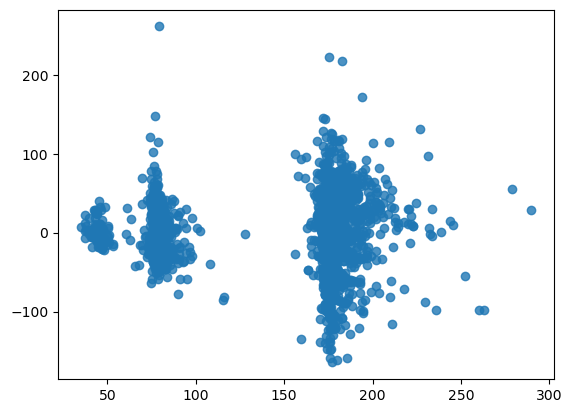

In [113]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax = sns.regplot(x=house1.fittedvalues, y=house1.resid_deviance, fit_reg=False)
fig.savefig('p5-ch-model_diagnostics/figures/resid_1')

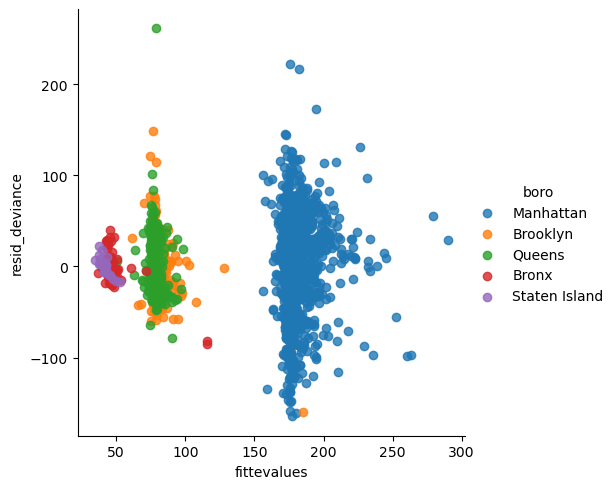

In [114]:
res_df = pd.DataFrame({
    'fittevalues': house1.fittedvalues,
    'resid_deviance': house1.resid_deviance,
    'boro': housing['boro']
})
fig = sns.lmplot(x='fittevalues', y='resid_deviance', data=res_df, hue='boro', fit_reg=False)
fig.savefig('p5-ch-model_diagnostics/figures/resid_boros')

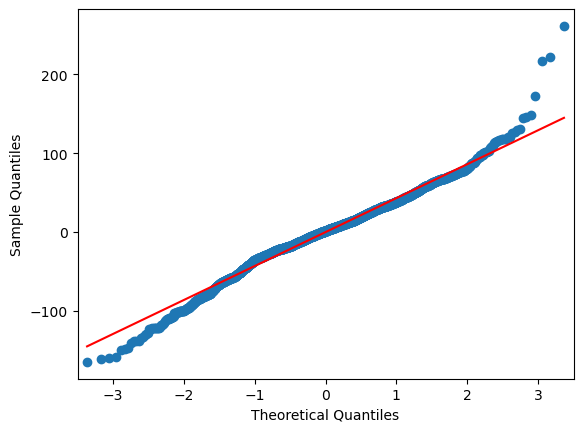

In [115]:
from scipy import stats
import statsmodels


resid = house1.resid_deviance.copy()
resid_std = stats.zscore(resid)
fig = statsmodels.graphics.gofplots.qqplot(resid, line='r')
fig.savefig('p5-ch-model_diagnostics/figures/house_1_qq')

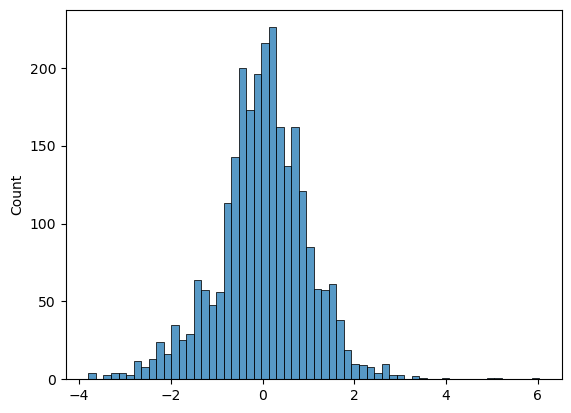

In [116]:
fig, ax = plt.subplots()
ax = sns.histplot(resid_std)
fig.savefig('p5-ch-model_diagnostics/figures/house_resid_std')

In [117]:
f1 = 'value_per_sq_ft ~ units + sq_ft + boro'
f2 = 'value_per_sq_ft ~ units * sq_ft + boro'
f3 = 'value_per_sq_ft ~ units + sq_ft * boro + type'
f4 = 'value_per_sq_ft ~ units + sq_ft * boro + sq_ft * type'
f5 = 'value_per_sq_ft ~ boro + type'

house1 = smf.ols(f1, data=housing).fit()
house2 = smf.ols(f2, data=housing).fit()
house3 = smf.ols(f3, data=housing).fit()
house4 = smf.ols(f4, data=housing).fit()
house5 = smf.ols(f5, data=housing).fit()

mod_results = pd.concat([house1.params, house2.params, house3.params, house4.params, house5.params], axis=1).\
    rename(columns=lambda x: 'house ' + str(x + 1)).\
    reset_index().\
    rename(columns={'index': 'param'}).\
    melt(id_vars='param', var_name='model', value_name='estimate')
mod_results.head()

,param,model,estimate
0,Intercept,house 1,43.290863
1,boro[T.Brooklyn],house 1,34.562150
2,boro[T.Manhattan],house 1,130.992363
3,boro[T.Queens],house 1,32.993674
4,boro[T.Staten Island],house 1,-3.630251


In [118]:
mod_results.tail()

,param,model,estimate
85,sq_ft:boro[T.Queens],house 5,NaN
86,sq_ft:boro[T.Staten Island],house 5,NaN
87,sq_ft:type[T.R4-CONDOMINIUM],house 5,NaN
88,sq_ft:type[T.R9-CONDOMINIUM],house 5,NaN
89,sq_ft:type[T.RR-CONDOMINIUM],house 5,NaN


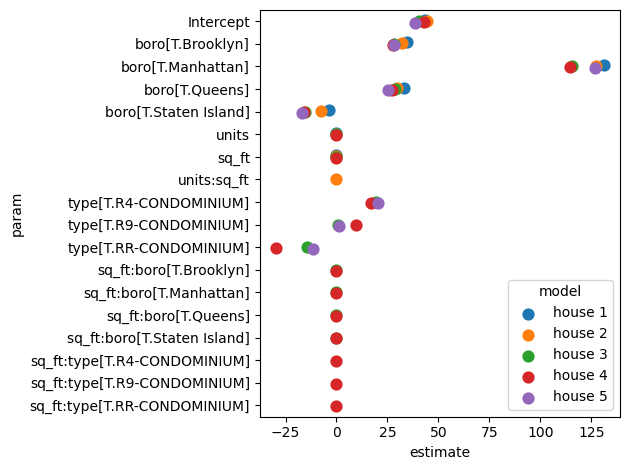

In [119]:
fig, ax = plt.subplots()
ax = sns.pointplot(x='estimate', y='param', hue='model', data=mod_results, dodge=True, # jitter the points
                   join=False # don't connect the points
                  )
plt.tight_layout()

In [120]:
model_names = ['house1', 'house2', 'house3', 'house4', 'house5']
house_anova = statsmodels.stats.anova.anova_lm(house1, house2, house3, house4, house5)
house_anova.index = model_names
house_anova

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
house1,2619.0,4.922389e+06,0.0,NaN,NaN,NaN
house2,2618.0,4.884872e+06,1.0,37517.437605,20.039049,7.912333e-06
house3,2612.0,4.619926e+06,6.0,264945.539994,23.585728,2.754431e-27
house4,2609.0,4.576671e+06,3.0,43255.441192,7.701289,4.025581e-05
house5,2618.0,4.901463e+06,-9.0,-324791.847907,19.275539,NaN


In [121]:
def anova_deviance_table(*models):
    return pd.DataFrame({
        'df_residuals': [i.df_resid for i in models],
        'resid_stddev': [i.deviance for i in models],
        'df': [i.df_model for i in models],
        'deviance': [i.deviance for i in models]
    })


glm1 = smf.glm(f1, data=housing).fit()
glm2 = smf.glm(f2, data=housing).fit()
glm3 = smf.glm(f3, data=housing).fit()
glm4 = smf.glm(f4, data=housing).fit()
glm5 = smf.glm(f5, data=housing).fit()
glm_anova = anova_deviance_table(glm1, glm2, glm3, glm4, glm5)
glm_anova

,df_residuals,resid_stddev,df,deviance
0,2619,4.922389e+06,6,4.922389e+06
1,2618,4.884872e+06,7,4.884872e+06
2,2612,4.619926e+06,13,4.619926e+06
3,2609,4.576671e+06,16,4.576671e+06
4,2618,4.901463e+06,7,4.901463e+06


In [122]:
housing['high_value'] = (housing['value_per_sq_ft'] >= 150).astype(int)
housing['high_value'].value_counts()

0    1619
1    1007
Name: high_value, dtype: int64

In [123]:
housing.columns

Index(['neighborhood', 'type', 'units', 'year_built', 'sq_ft', 'income',
       'income_per_sq_ft', 'expense', 'expense_per_sq_ft', 'net_income',
       'value', 'value_per_sq_ft', 'boro', 'high_value'],
      dtype='object')

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(housing[['units', 'sq_ft', 'boro']], drop_first=True),
                                                    housing['value_per_sq_ft'],
                                                    test_size=0.2,
                                                    random_state=42)
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.6137125285030869

In [125]:
from patsy import dmatrices


y, X = dmatrices('value_per_sq_ft ~ units + sq_ft + boro', housing, return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.6137125285025644

In [126]:
from sklearn.model_selection import KFold, cross_val_score


kf = KFold(n_splits=5)
y, X = dmatrices('value_per_sq_ft ~ units + sq_ft + boro', housing)
coefs = []
scores = []
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    lr = LinearRegression().fit(X_train, y_train)
    coefs.append(pd.DataFrame(lr.coef_))
    scores.append(lr.score(X_test, y_test))
coefs_df = pd.concat(coefs)
coefs_df.columns = X.design_info.column_names
coefs_df

,Intercept,boro[T.Brooklyn],boro[T.Manhattan],boro[T.Queens],boro[T.Staten Island],units,sq_ft
0,0.0,33.369037,129.904011,32.103100,-4.381085e+00,-0.205890,0.000220
0,0.0,32.889925,116.957385,31.295956,-4.919232e+00,-0.146180,0.000155
0,0.0,30.975560,141.859327,32.043449,-4.379916e+00,-0.179671,0.000194
0,0.0,41.449196,130.779013,33.050968,-3.430209e+00,-0.207904,0.000232
0,0.0,-38.511915,56.069855,-17.557939,7.105427e-15,-0.145829,0.000202


In [127]:
coefs_df.apply(np.mean)

Intercept                  0.000000
boro[T.Brooklyn]          20.034361
boro[T.Manhattan]        115.113918
boro[T.Queens]            22.187107
boro[T.Staten Island]     -3.422088
units                     -0.177095
sq_ft                      0.000201
dtype: float64

In [128]:
scores

[0.02731416290643096,
 -0.5538362212409076,
 -0.15636371688048523,
 -0.3234202061928799,
 -1.6929655586930759]

In [129]:
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)
scores

array([ 0.02731416, -0.55383622, -0.15636372, -0.32342021, -1.69296556])

In [130]:
scores.mean()

-0.5398543080201835

In [131]:
y1, X1 = dmatrices('value_per_sq_ft ~ units + sq_ft + boro', housing)
y2, X2 = dmatrices('value_per_sq_ft ~ units * sq_ft + boro', housing)
y3, X3 = dmatrices('value_per_sq_ft ~ units + sq_ft * boro + type', housing)
y4, X4 = dmatrices('value_per_sq_ft ~ units + sq_ft * boro + sq_ft * type', housing)
y5, X5 = dmatrices('value_per_sq_ft ~ boro + type', housing)
model = LinearRegression()
scores1 = cross_val_score(model, X1, y1, cv=5)
scores2 = cross_val_score(model, X2, y2, cv=5)
scores3 = cross_val_score(model, X3, y3, cv=5)
scores4 = cross_val_score(model, X4, y4, cv=5)
scores5 = cross_val_score(model, X5, y5, cv=5)
scores_df = pd.DataFrame([scores1, scores2, scores3, scores4, scores5])
scores_df.apply(np.mean, axis=1)

0   -5.398543e-01
1   -1.088184e+00
2   -3.569802e+26
3   -1.109403e+27
4   -3.209760e+25
dtype: float64

In [132]:
acs.columns

Index(['Acres', 'FamilyIncome', 'FamilyType', 'NumBedrooms', 'NumChildren',
       'NumPeople', 'NumRooms', 'NumUnits', 'NumVehicles', 'NumWorkers',
       'OwnRent', 'YearBuilt', 'HouseCosts', 'ElectricBill', 'FoodStamp',
       'HeatingFuel', 'Insurance', 'Language', 'ge150k', 'ge150k_i'],
      dtype='object')

In [133]:
response, predictors = dmatrices('FamilyIncome ~ NumBedrooms + NumChildren + NumPeople + NumRooms + NumUnits + NumVehicles + NumWorkers + OwnRent + YearBuilt + ElectricBill + FoodStamp + HeatingFuel + Insurance + Language', data=acs)
X_train, X_test, y_train, y_test = train_test_split(predictors, response, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
model_coefs = pd.DataFrame(list(zip(predictors.design_info.column_names, lr.coef_[0])), columns=['variable', 'coef_lr'])
model_coefs

,variable,coef_lr
0,Intercept,4.154590e-09
1,NumUnits[T.Single attached],3.135646e+04
2,NumUnits[T.Single detached],2.418368e+04
3,OwnRent[T.Outright],2.839186e+04
4,OwnRent[T.Rented],7.229586e+03
5,YearBuilt[T.1940-1949],1.292169e+04
6,YearBuilt[T.1950-1959],2.057793e+04
7,YearBuilt[T.1960-1969],1.764835e+04
8,YearBuilt[T.1970-1979],1.756881e+04
9,YearBuilt[T.1980-1989],2.552566e+04


In [134]:
lr.score(X_train, y_train)

0.2726140465638568

In [135]:
lr.score(X_test, y_test)

0.2697697956848807

In [136]:
from sklearn.linear_model import Ridge


ridge = Ridge(random_state=0).fit(X_train, y_train)
coefs_ridge = pd.DataFrame(list(zip(predictors.design_info.column_names, ridge.coef_[0])), columns=['variable', 'coef_ridge'])
model_coefs = pd.merge(model_coefs, coefs_ridge, on='variable')
model_coefs

,variable,coef_lr,coef_ridge
0,Intercept,4.154590e-09,0.000000
1,NumUnits[T.Single attached],3.135646e+04,31280.290462
2,NumUnits[T.Single detached],2.418368e+04,24072.769421
3,OwnRent[T.Outright],2.839186e+04,28057.961345
4,OwnRent[T.Rented],7.229586e+03,7216.058903
5,YearBuilt[T.1940-1949],1.292169e+04,-3835.358400
6,YearBuilt[T.1950-1959],2.057793e+04,3813.608548
7,YearBuilt[T.1960-1969],1.764835e+04,880.297908
8,YearBuilt[T.1970-1979],1.756881e+04,787.627330
9,YearBuilt[T.1980-1989],2.552566e+04,8746.602895


In [137]:
from sklearn.linear_model import ElasticNet


en = ElasticNet(random_state=42).fit(X_train, y_train)
coefs_en = pd.DataFrame(list(zip(predictors.design_info.column_names, en.coef_)), columns=['variable', 'coef_en'])
model_coefs = pd.merge(model_coefs, coefs_en, on='variable')
model_coefs

,variable,coef_lr,coef_ridge,coef_en
0,Intercept,4.154590e-09,0.000000,0.000000
1,NumUnits[T.Single attached],3.135646e+04,31280.290462,1342.291706
2,NumUnits[T.Single detached],2.418368e+04,24072.769421,168.728479
3,OwnRent[T.Outright],2.839186e+04,28057.961345,445.533238
4,OwnRent[T.Rented],7.229586e+03,7216.058903,-600.673747
5,YearBuilt[T.1940-1949],1.292169e+04,-3835.358400,-794.239494
6,YearBuilt[T.1950-1959],2.057793e+04,3813.608548,513.289101
7,YearBuilt[T.1960-1969],1.764835e+04,880.297908,-275.576200
8,YearBuilt[T.1970-1979],1.756881e+04,787.627330,-574.365605
9,YearBuilt[T.1980-1989],2.552566e+04,8746.602895,708.813588


In [138]:
from sklearn.linear_model import ElasticNetCV


en_cv = ElasticNetCV(cv=5, random_state=42).fit(X_train, np.ravel(y_train))
coefs_en_cv = pd.DataFrame(list(zip(predictors.design_info.column_names, en_cv.coef_)), columns=['variable', 'coef_en_cv'])
model_coefs = pd.merge(model_coefs, coefs_en_cv, on='variable')
model_coefs

,variable,coef_lr,coef_ridge,coef_en,coef_en_cv
0,Intercept,4.154590e-09,0.000000,0.000000,0.000000
1,NumUnits[T.Single attached],3.135646e+04,31280.290462,1342.291706,-0.000000
2,NumUnits[T.Single detached],2.418368e+04,24072.769421,168.728479,0.000000
3,OwnRent[T.Outright],2.839186e+04,28057.961345,445.533238,0.000000
4,OwnRent[T.Rented],7.229586e+03,7216.058903,-600.673747,-0.000000
5,YearBuilt[T.1940-1949],1.292169e+04,-3835.358400,-794.239494,-0.000000
6,YearBuilt[T.1950-1959],2.057793e+04,3813.608548,513.289101,0.000000
7,YearBuilt[T.1960-1969],1.764835e+04,880.297908,-275.576200,0.000000
8,YearBuilt[T.1970-1979],1.756881e+04,787.627330,-574.365605,-0.000000
9,YearBuilt[T.1980-1989],2.552566e+04,8746.602895,708.813588,0.000000


In [139]:
wine = pd.read_csv('../data/wine.csv')
wine.head()

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [140]:
wine = wine.drop('Cultivar', axis=1)
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [141]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=42).fit(wine.values)
kmeans

c:\Users\admin\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [142]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([69, 47, 62], dtype=int64))

In [143]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])
kmeans_3.head()

,cluster
0,1
1,1
2,1
3,1
4,2


In [144]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2).fit(wine)
pca_trans = pca.transform(wine)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.head()

,cluster,pca1,pca2
0,1,318.562979,21.492131
1,1,303.097420,-5.364718
2,1,438.061133,-6.537309
3,1,733.240139,0.192729
4,2,-11.571428,18.489995


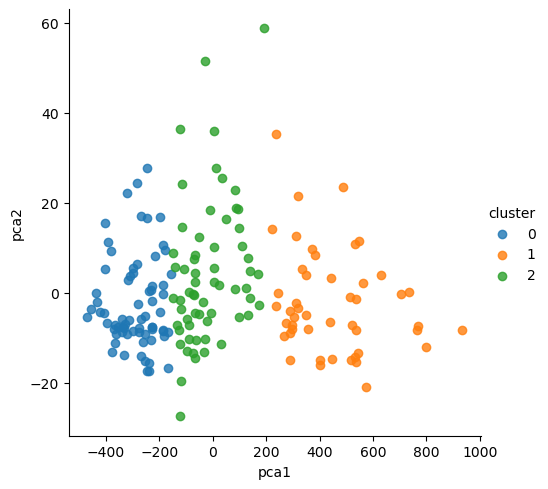

In [145]:
fig = sns.lmplot(x='pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False)

In [146]:
wine_all = pd.read_csv('../data/wine.csv')
wine_all.head()

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


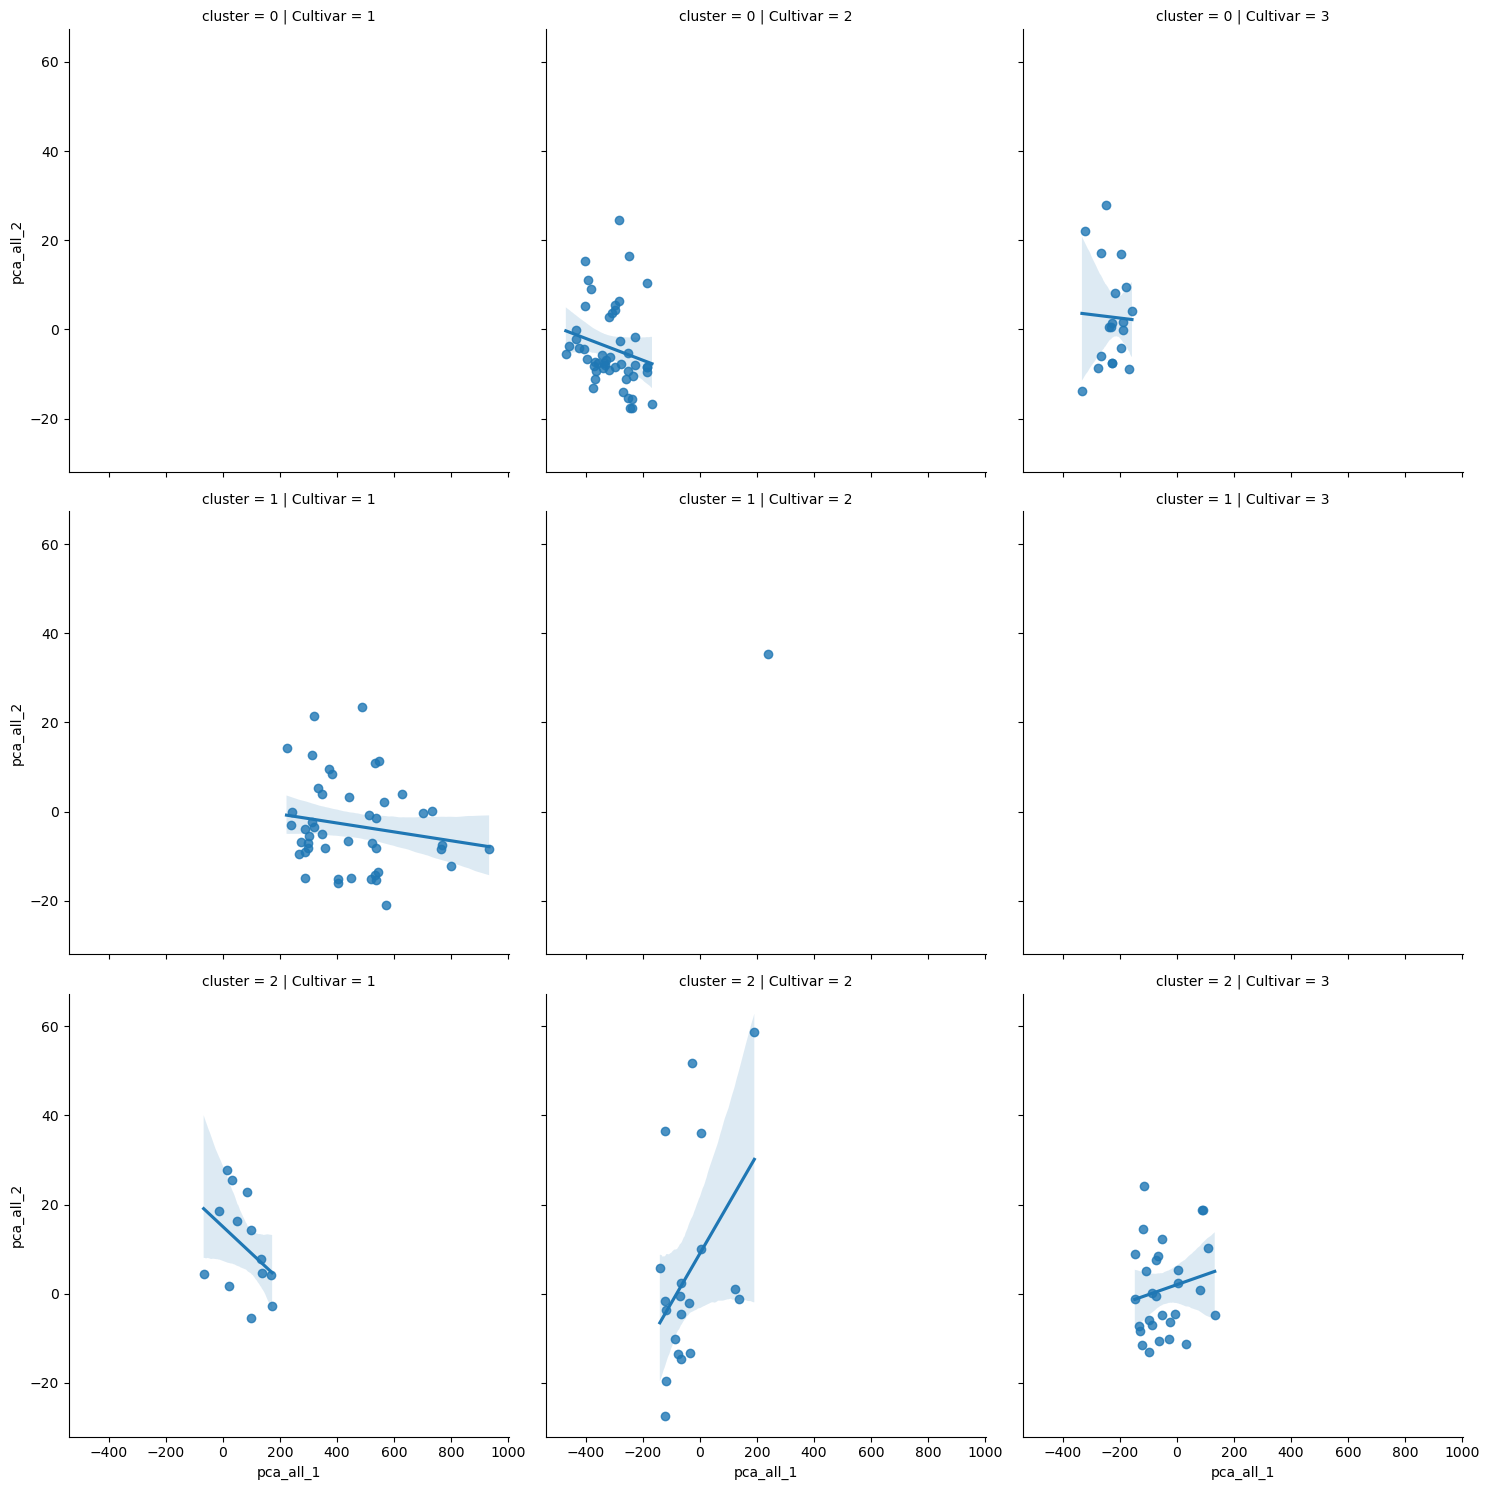

In [147]:
pca_all = PCA(n_components=2).fit(wine_all)
pca_all_trans = pca_all.transform(wine_all)
pca_all_trans_df = pd.DataFrame(pca_all_trans, columns=['pca_all_1', 'pca_all_2'])
kmeans_3 = pd.concat([kmeans_3, pca_all_trans_df, wine_all['Cultivar']], axis=1)

with sns.plotting_context(font_scale=5):
    fig = sns.lmplot(x='pca_all_1', y='pca_all_2', data=kmeans_3, row='cluster', col='Cultivar')

In [148]:
pd.crosstab(kmeans_3['cluster'], kmeans_3['Cultivar'], margins=True)

Cultivar,1,2,3,All
cluster,,,,
0,0,50,19,69
1,46,1,0,47
2,13,20,29,62
All,59,71,48,178


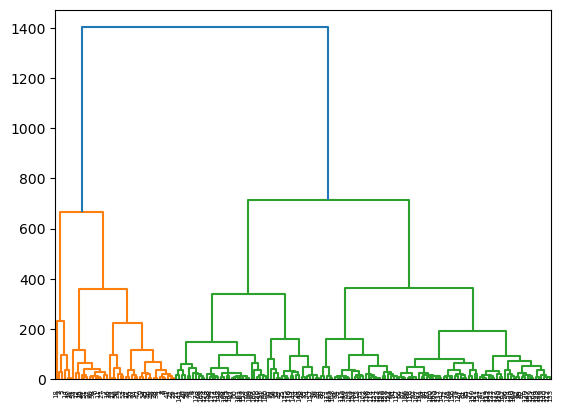

In [149]:
from scipy.cluster import hierarchy


wine_complete = hierarchy.complete(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_complete)

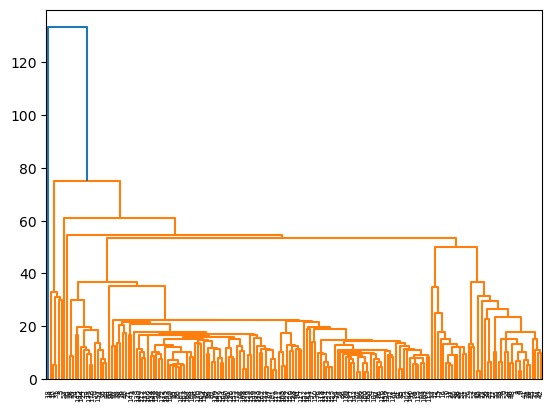

In [150]:
wine_single = hierarchy.single(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_single)

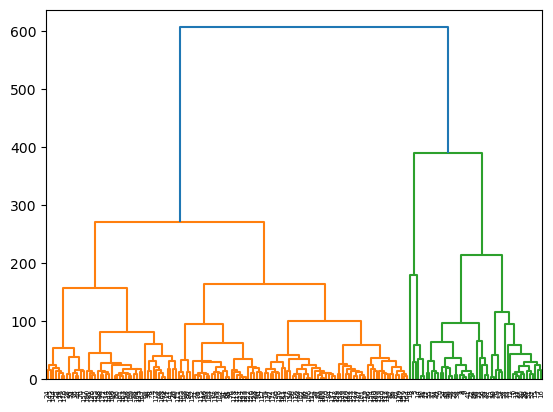

In [151]:
wine_average = hierarchy.average(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_average)

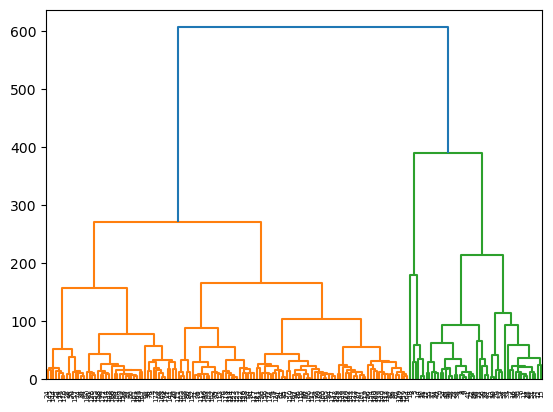

In [152]:
wine_centroid = hierarchy.centroid(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_centroid)

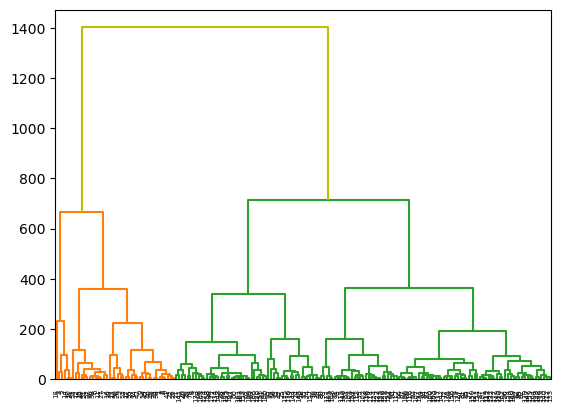

In [153]:
wine_complete = hierarchy.complete(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_complete, color_threshold=0.7 * max(wine_complete[:, 2]), above_threshold_color='y')